<a href="https://colab.research.google.com/github/SyedHuzaifa007/PIAIC-Deep-Learning-Assignments/blob/main/Credit_Card_Fraud_Detection_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Fraud Detection::

Download dataset from this link:

https://www.kaggle.com/mlg-ulb/creditcardfraud

# Description about dataset::

The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. 


### Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# WORKFLOW :

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Standardized the Input Variables. 

4.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

5.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

6.Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)

7.Train the Model with Epochs (100).

8.If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .

9.Prediction should be > 92%
10.Evaluation Step
11Prediction


# Task::

## Identify fraudulent credit card transactions.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
# Importing Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
import tensorboard
from pylab import rcParams

In [26]:
# Loading The Data
df = pd.read_csv("/content/drive/MyDrive/ML_Datasets/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [30]:
# Configuring Modules
%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale = 1.5)
rcParams['figure.figsize'] = 14, 8
Random_Seed = 42
labels = ['Valid', 'Fraud']

In [28]:
df.shape

(284807, 31)

In [29]:
# Checking Data For Null Values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

OUR DATA CONTAINS NO NULL VALUES

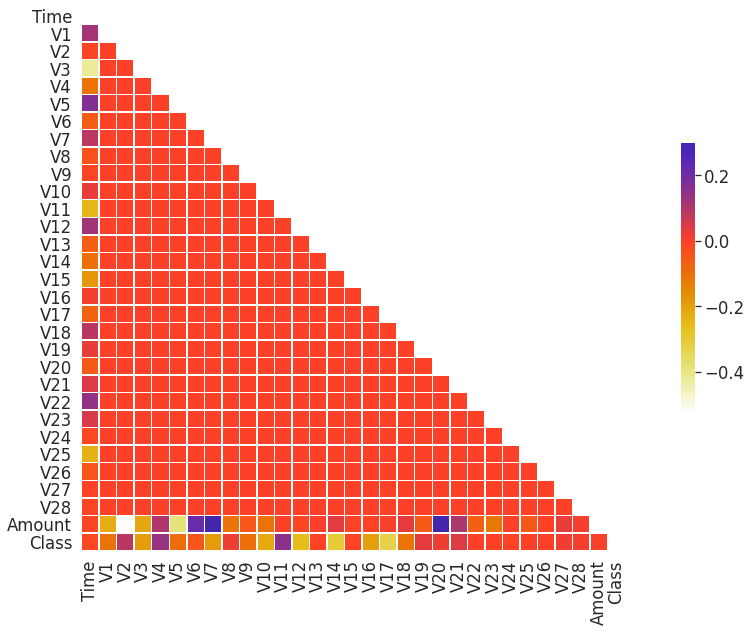

In [44]:
# Checking Correlations
corr = df.corr()

# generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# figure size
f, ax = plt.subplots(figsize=(20, 10))

# generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='CMRmap_r', vmax=.3, center=0, square=True,
            linewidths=.5, cbar_kws={"shrink": .5})

In [18]:
# Renaming Columns
df.rename(columns = {"Class": "Fraud"}, inplace = True)

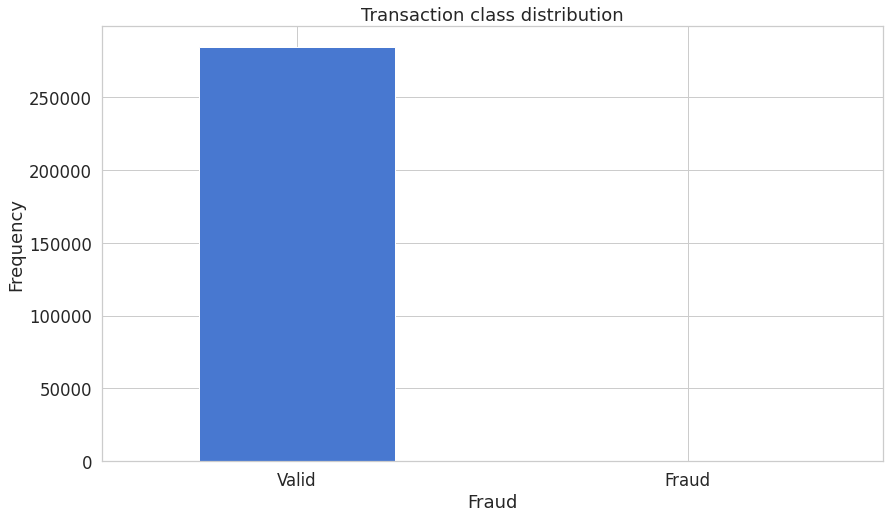

In [33]:
# Visualizing The Data
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), labels)
plt.xlabel("Fraud")
plt.ylabel("Frequency");

In [36]:
# Renaming The Columns
Frauds = df[df.Class == 1]
Valid = df[df.Class == 0]

In [37]:
print(Frauds.shape)
print(Valid.shape)

(492, 31)
(284315, 31)


As We Can See That We Have Highly Unbalanced Dataset We'll Have To Balance It.

In [38]:
# Checking Important Stats of Fraud Transactions
Frauds.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [39]:
# Checking Imprtant Stats of Valid Transactions
Valid.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

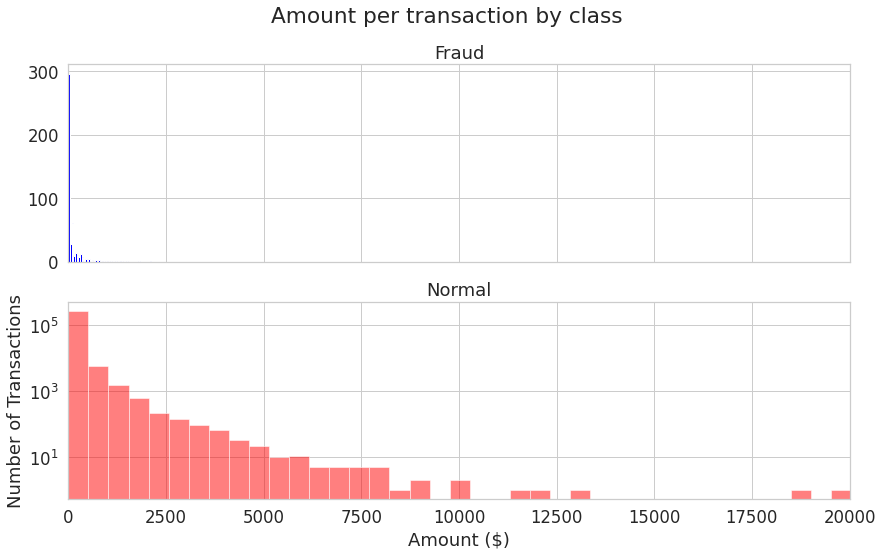

In [53]:
# Amount per transaction by class
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')

bins = 50

ax1.hist(Frauds.Amount, bins = bins, color='blue')
ax1.set_title('Fraud')

ax2.hist(Valid.Amount, bins = bins, color='red', alpha = 0.5)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

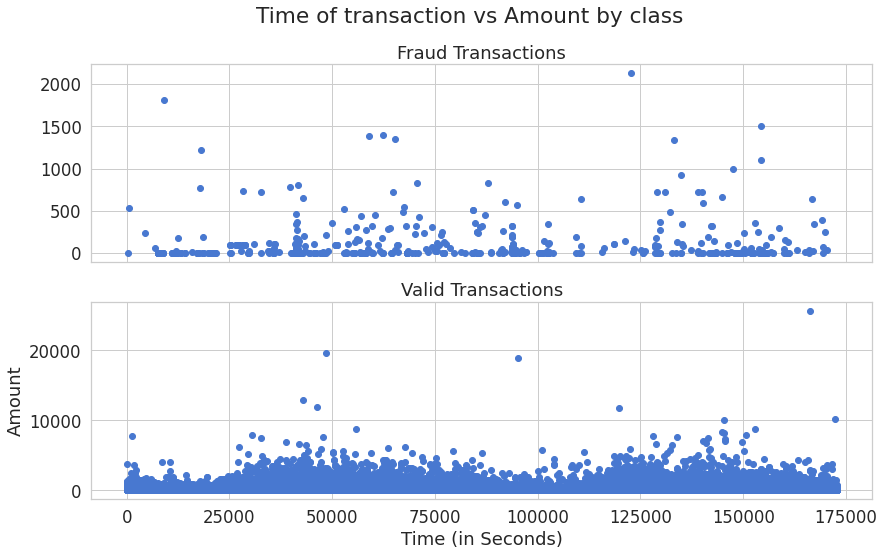

In [56]:
# Time of transaction vs Amount by class
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')

ax1.scatter(Frauds.Time, Frauds.Amount)
ax1.set_title('Fraud Transactions')

ax2.scatter(Valid.Time,Valid.Amount)
ax2.set_title('Valid Transactions')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [58]:
# Splitting The Dataset Into Testing And Training Dataset
df.shape

(284807, 31)

In [73]:
train_data = df.iloc[:199365,:]
train_data.shape

(199365, 31)

In [74]:
test_data = df.iloc[199365:,:]
test_data.shape

(85442, 31)

In [75]:
train_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [76]:
test_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
199365,132929.0,2.152590,-0.900447,-1.092456,-0.994969,-0.613447,-0.760012,-0.530218,-0.222248,-0.214416,0.746967,-1.256213,-0.762171,0.086847,-0.133543,0.365813,1.400839,-0.115840,-1.594770,1.026636,0.060715,-0.281725,-0.987236,0.358646,-0.782338,-0.480245,-0.647930,-0.023563,-0.044354,55.95,0
199366,132929.0,1.811278,0.224393,0.542888,3.606222,-0.162910,1.171241,-0.874598,0.419449,-0.546470,1.493825,0.583293,0.884700,0.831223,-0.293394,-0.870717,1.653737,-1.335181,0.431294,-1.605950,-0.198616,0.109290,0.345703,0.365984,0.663253,-0.531272,-0.225013,0.032563,-0.022693,0.79,0
199367,132929.0,-1.524832,-0.544095,-0.288824,-0.916791,3.524219,-1.830070,1.375925,-0.814647,-0.648070,-0.072189,1.020453,0.808519,0.179530,0.403686,-1.355320,-0.890292,-0.823874,-0.161798,-0.240885,-0.209666,0.272832,1.245119,-0.867245,0.838885,0.860487,-0.081074,-0.252743,-0.377957,30.90,0
199368,132930.0,0.099135,0.873164,-0.362487,-0.612234,0.747229,-0.629384,0.755890,0.126794,-0.051667,-0.613531,0.826612,-0.315592,-1.848798,-0.465431,-0.757847,0.571839,0.262660,0.450587,0.023705,-0.090654,-0.302759,-0.840999,0.115856,0.613080,-0.528392,0.092546,0.207960,0.071553,1.78,0
199369,132930.0,2.005556,-0.146704,-1.019430,0.330239,-0.180449,-0.953319,0.053860,-0.165823,0.352282,0.255342,0.953976,0.886864,-0.546470,0.579937,-0.610841,0.088436,-0.475671,-0.341351,0.402815,-0.241755,-0.235137,-0.613122,0.342269,0.063677,-0.359509,0.174021,-0.078440,-0.069642,5.37,0


In [77]:
# Shuffling Training And Testing Data
train_data.sample(frac=1)
train_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [78]:
test_data.sample(frac = 1)
test_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
199365,132929.0,2.152590,-0.900447,-1.092456,-0.994969,-0.613447,-0.760012,-0.530218,-0.222248,-0.214416,0.746967,-1.256213,-0.762171,0.086847,-0.133543,0.365813,1.400839,-0.115840,-1.594770,1.026636,0.060715,-0.281725,-0.987236,0.358646,-0.782338,-0.480245,-0.647930,-0.023563,-0.044354,55.95,0
199366,132929.0,1.811278,0.224393,0.542888,3.606222,-0.162910,1.171241,-0.874598,0.419449,-0.546470,1.493825,0.583293,0.884700,0.831223,-0.293394,-0.870717,1.653737,-1.335181,0.431294,-1.605950,-0.198616,0.109290,0.345703,0.365984,0.663253,-0.531272,-0.225013,0.032563,-0.022693,0.79,0
199367,132929.0,-1.524832,-0.544095,-0.288824,-0.916791,3.524219,-1.830070,1.375925,-0.814647,-0.648070,-0.072189,1.020453,0.808519,0.179530,0.403686,-1.355320,-0.890292,-0.823874,-0.161798,-0.240885,-0.209666,0.272832,1.245119,-0.867245,0.838885,0.860487,-0.081074,-0.252743,-0.377957,30.90,0
199368,132930.0,0.099135,0.873164,-0.362487,-0.612234,0.747229,-0.629384,0.755890,0.126794,-0.051667,-0.613531,0.826612,-0.315592,-1.848798,-0.465431,-0.757847,0.571839,0.262660,0.450587,0.023705,-0.090654,-0.302759,-0.840999,0.115856,0.613080,-0.528392,0.092546,0.207960,0.071553,1.78,0
199369,132930.0,2.005556,-0.146704,-1.019430,0.330239,-0.180449,-0.953319,0.053860,-0.165823,0.352282,0.255342,0.953976,0.886864,-0.546470,0.579937,-0.610841,0.088436,-0.475671,-0.341351,0.402815,-0.241755,-0.235137,-0.613122,0.342269,0.063677,-0.359509,0.174021,-0.078440,-0.069642,5.37,0


In [79]:
# Droping Labels From Testing And Training Data
train_labels = train_data.pop('Class')
train_labels = train_labels.values
test_labels = test_data.pop('Class')
test_labels = test_labels.values

In [81]:
train_labels

array([0, 0, 0, ..., 0, 0, 0])

In [82]:
test_labels

array([0, 0, 0, ..., 0, 0, 0])

In [90]:
# Building Base Model
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
input_dim = train_data.shape[1]
encoding_dim = 14
input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="tanh", activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)
decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

In [91]:
autoencoder.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [95]:
from keras.callbacks import ModelCheckpoint, TensorBoard
checkpointer = ModelCheckpoint(filepath = 'CreditCardFraudDetectionModel.h5', verbose = 0, save_best_only = True)
tensorboard = TensorBoard(log_dir = './logs', histogram_freq = 0, write_graph = True, write_images = True)

In [96]:
# Fitting Model
history = autoencoder.fit(train_data, train_labels, epochs = 100, batch_size = 32, shuffle=True, validation_data=(test_data, test_labels), verbose = 1, callbacks=[checkpointer, tensorboard]).history

Epoch 1/100
6231/6231 [==============================] - 13s 2ms/step - loss: 0.0035 - accuracy: 0.9374 - val_loss: 0.0027 - val_accuracy: 0.9987
Epoch 2/100
6231/6231 [==============================] - 12s 2ms/step - loss: 0.0032 - accuracy: 0.9919 - val_loss: 0.0027 - val_accuracy: 0.9987
Epoch 3/100
6231/6231 [==============================] - 12s 2ms/step - loss: 0.0034 - accuracy: 0.9980 - val_loss: 0.0027 - val_accuracy: 0.9987
Epoch 4/100
6231/6231 [==============================] - 11s 2ms/step - loss: 0.0032 - accuracy: 0.9978 - val_loss: 0.0027 - val_accuracy: 0.9987
Epoch 5/100
6231/6231 [==============================] - 12s 2ms/step - loss: 0.0032 - accuracy: 0.9973 - val_loss: 0.0027 - val_accuracy: 0.9987
Epoch 6/100
6231/6231 [==============================] - 12s 2ms/step - loss: 0.0034 - accuracy: 0.9980 - val_loss: 0.0027 - val_accuracy: 0.9987
Epoch 7/100
6231/6231 [==============================] - 12s 2ms/step - loss: 0.0033 - accuracy: 0.9978 - val_loss: 0.0027 -